In [26]:
import nltk

1.	写程序处理布朗语料库，找到以下问题的答案：a. 哪些名词常以它们复数形式而不是它们的单数形式出现？（只考虑常规的复数形式，-s 后缀形式的）。

In [121]:
text = nltk.corpus.brown.tagged_words()
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag,word) for (word,tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return {tag:cfd[tag].most_common() for tag in cfd.conditions()}

tagdict = findtags('NN',text)
result = [word[0] for word in tagdict['NNS'] if word[0].endswith('s')]
print(result[:20])#打印出最常以复数形式出现的名词（只考虑-s后缀形式）

['years', 'eyes', 'days', 'things', 'members', 'others', 'hands', 'words', 'times', 'problems', 'areas', 'students', 'lines', 'minutes', 'schools', 'months', 'values', 'conditions', 'hours', 'miles']


b. 哪个词的不同词性标记数目最多？

In [59]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) 
                                for (word, tag) in brown_news_tagged)

max([(word, len(data[word])) for word in data], key=lambda x: x[1])

('down', 6)

In [60]:
[(word,data['down'][word]) for word in data['down']]

[('PRT', 696), ('ADP', 192), ('NOUN', 2), ('ADV', 2), ('VERB', 2), ('ADJ', 1)]

In [55]:
common = sorted([(word,len(data[word])) for word in data], reverse = True, key=lambda x: x[1])
common[:20]

[('that', 4),
 ('best', 4),
 ('present', 4),
 ('close', 4),
 ('open', 4),
 ('further', 3),
 ('to', 3),
 ('a', 3),
 ('such', 3),
 ('next', 3),
 ('under', 3),
 ('back', 3),
 ('top', 3),
 ('force', 3),
 ('out', 3),
 ('head', 3),
 ('near', 3),
 ('about', 3),
 ('while', 3),
 ('last', 3)]

c. 按频率递减的顺序列出标记。前20 个最频繁的词性标记代表什么？

In [92]:
tagset = nltk.data.load('help/tagsets/upenn_tagset.pickle')
get_explain = lambda tag: tagset[tag][0] + "\n"  + tagset[tag][1] if tag in tagset else "Not Found!"
tags = nltk.FreqDist(tag for (word,tag) in nltk.corpus.brown.tagged_words())
common = sorted([(tag,tags[tag]) for tag in tags], reverse = True, key=lambda x:x[1])
result = [(word, get_explain(word)) for (word, _) in common[:20]]

In [95]:
for word, explain in result:
    print("{}: {}".format(word, explain))
    print()

NN: noun, common, singular or mass
common-carrier cabbage knuckle-duster Casino afghan shed thermostat investment slide humour falloff slick wind hyena override subhumanity machinist ... 

IN: preposition or conjunction, subordinating
astride among uppon whether out inside pro despite on by throughout below within for towards near behind atop around if like until below next into if beside ... 

AT: Not Found!

JJ: adjective or numeral, ordinal
third ill-mannered pre-war regrettable oiled calamitous first separable ectoplasmic battery-powered participatory fourth still-to-be-named multilingual multi-disciplinary ... 

.: sentence terminator
. ! ? 

,: comma
, 

NNS: noun, common, plural
undergraduates scotches bric-a-brac products bodyguards facets coasts divestitures storehouses designs clubs fragrances averages subjectivists apprehensions muses factory-jobs ... 

CC: conjunction, coordinating
& 'n and both but either et for less minus neither nor or plus so therefore times v. versus v

d. 名词后面最常见的是哪些词性标记？这些标记代表什么？

In [113]:
brown_tagged = brown.tagged_words()
word_after_none = [b[1] for (a, b) in nltk.bigrams(brown_tagged) if a[1] == 'NN']
cfd = nltk.FreqDist(word_after_none)
tag_result = cfd.most_common(10)
result = [(tag, get_explain(tag)) for (tag, _) in tag_result]
for word, explain in result:
    print("{}: {}".format(word, explain))
    print()

IN: preposition or conjunction, subordinating
astride among uppon whether out inside pro despite on by throughout below within for towards near behind atop around if like until below next into if beside ... 

.: sentence terminator
. ! ? 

,: comma
, 

NN: noun, common, singular or mass
common-carrier cabbage knuckle-duster Casino afghan shed thermostat investment slide humour falloff slick wind hyena override subhumanity machinist ... 

CC: conjunction, coordinating
& 'n and both but either et for less minus neither nor or plus so therefore times v. versus vs. whether yet 

NNS: noun, common, plural
undergraduates scotches bric-a-brac products bodyguards facets coasts divestitures storehouses designs clubs fragrances averages subjectivists apprehensions muses factory-jobs ... 

BEZ: Not Found!

VBD: verb, past tense
dipped pleaded swiped regummed soaked tidied convened halted registered cushioned exacted snubbed strode aimed adopted belied figgered speculated wore appreciated contempl

例5-4 绘制曲线显示查找标注器的性能随模型的大小增加的变化。绘制当训练数据量变化时unigram 标注器的性能曲线。

[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806), ('that', 802), ('``', 732), ('is', 732), ('was', 717), ("''", 702), ('on', 657), ('at', 598), ('with', 545), ('be', 526), ('by', 497), ('as', 481), ('he', 451), ('said', 402), ('his', 399), ('will', 389), ('it', 363), ('from', 344), ('are', 328), (';', 314), ('an', 300), ('has', 300), ('--', 300), ('had', 279), ('who', 268), ('have', 265), ('not', 254), ('Mrs.', 253), ('were', 252), ('this', 250), ('which', 244), ('would', 244), ('their', 219), ('been', 212), ('they', 205), ('He', 191), ('one', 184), ('I', 179), ('but', 174), ('its', 174), ('or', 173), (')', 171), ('more', 171), ('Mr.', 170), ('(', 168), ('up', 168), ('all', 163), ('out', 161), ('last', 161), ('two', 157), ('other', 149), (':', 149), ('new', 148), ('first', 143), ('than', 138), ('year', 138), ('A', 137), ('about', 136), ('there', 131), ('when', 128), ('home', 127), ('after', 127), 

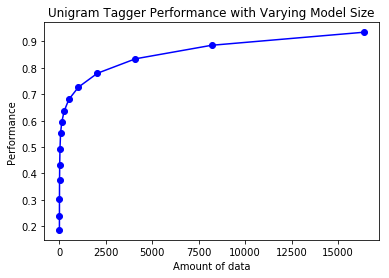

In [117]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    print(word_freqs)
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Unigram Tagger Performance with Varying Model Size')
    pylab.xlabel('Amount of data')
    pylab.ylabel('Performance')
    pylab.show()
display()